<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>
<font size="5"></br> UE Deep Learning: Lab sessions 1 and 2</font></br></div>
</CENTER>
<CENTER>
<font size="3"></br>October 2019</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue">pierre.tandeo@imt-atlantique.fr</span>
</CENTER>
<CENTER>
<span style="color:blue">pierre-henri.conze@imt-atlantique.fr</span>
</CENTER>
</div>

The aim of this practice is to explain $Y$ (output variable) as a function of $X$ (input variable) using neural networks. Here, $X$ are continuous and $Y$ can be continuous (*regression*) or discrete (*classification*). These 2 aspects are treated in the deep learning framework. Both linear and nonlinear cases will be covered in this lab session.

We use the Keras Python library to implement deep learning architectures. This interface has the following characteristics:
- it is developped for both *Tensorflow* and *Theano*
- it can be applied to CPU or GPU without distinction
- it can interact with classical machine learning libraries like *Scikit-learn*

This lab session is an introduction. It gives you the general concepts of neural nets and helps you to implement them using a dedicated Python library. If you want to play with similar regression/classification examples in small dimensions, you can use http://playground.tensorflow.org/. For more details concerning Keras, please visit the documentation at https://keras.io/.

In [5]:
# Import libraries
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize']=(15,15)

Populating the interactive namespace from numpy and matplotlib


**Regression problems**

Simple regression is a linear problem between continuous variables $X$ and $Y$. Here, we write the model $Y=2+0.5X$ and generate $Y$ using an additional Gaussian standard random noise.

Text(0, 0.5, 'Y')

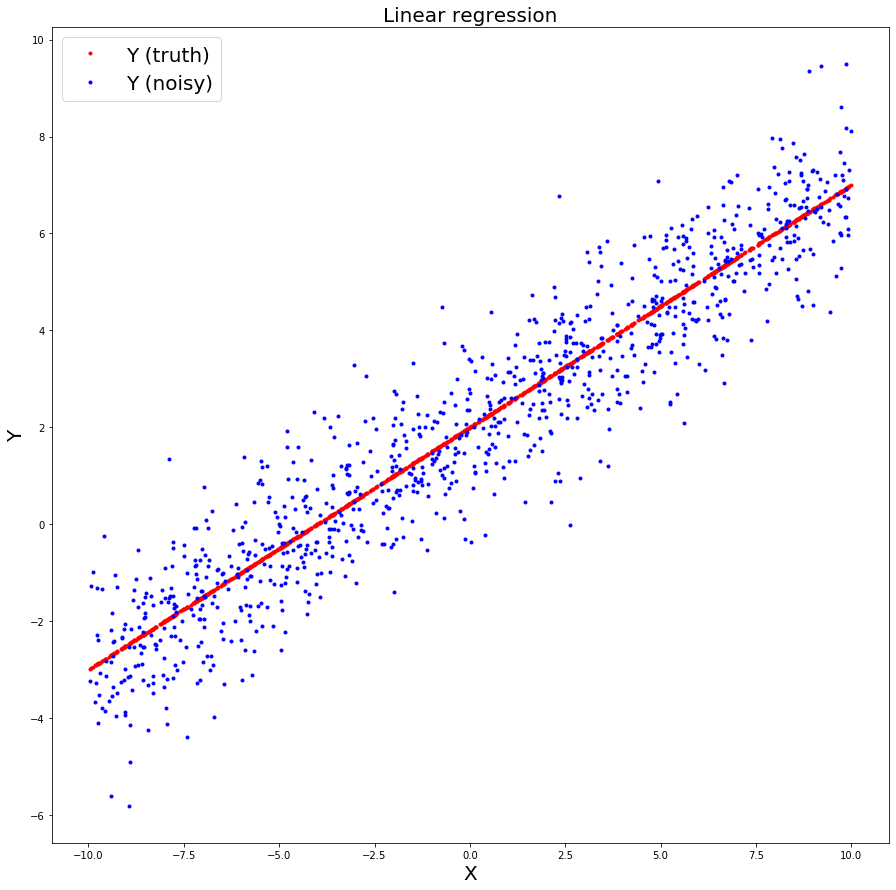

In [6]:
# Generate data
n=1000
X=random.uniform(-10,10,n)
Y_true=2+0.5*X # true model
Y=Y_true+random.normal(0,1,n) # add noise to the truth

# Plot noisy data and true model
plot(X, Y_true, 'r.')
plot(X, Y, 'b.')
legend(['Y (truth)','Y (noisy)'], prop={'size': 20})
title('Linear regression', size=20)
xlabel('X', size=20)
ylabel('Y', size=20)

Here, the objective is to build a neural net to fit the linear relationships between $X$ and $Y$. We use the mean absolute error as loss function and the stochastic gradient descent (sgd) algorithm for the optimization procedure. Then, we fit the model on a training dataset (80%) and we evaluate the performance of the model on a test dataset (20%). Finally, we plot the estimated parameters corresponding to the weights for each neurone.

In [7]:
# Import deep learning library
from keras.models import Sequential
from keras.layers.core import Activation, Dense
from keras.optimizers import SGD, Adam

# Build our model
model_regress1 = Sequential()
 
# Declare the layers
layers = [Dense(units=1, input_dim=1), Activation('linear')]
 
# Add the layers to the model
for layer in layers:
    model_regress1.add(layer)

# Configure an optimizer used to minimize the loss function
sgd = SGD(lr=0.1, decay=.01)

# Compile our model
model_regress1.compile(loss='mean_absolute_error', optimizer=sgd)
 
# Fit the model
model_regress1.fit(X, Y, validation_split=0.2, epochs=100)

# Model summary and weights
model_regress1.get_weights() # model_regress1.layers[0].get_weights()

Using TensorFlow backend.
/homes/v18porti/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/homes/v18porti/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/homes/v18porti/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/homes/v18porti/.local/lib/python3.6/site-packages/tenso

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 158us/step - loss: 1.4718 - val_loss: 0.8550
Epoch 2/100
800/800 [==============================] - 0s 27us/step - loss: 0.8838 - val_loss: 0.9914
Epoch 3/100
800/800 [==============================] - 0s 23us/step - loss: 0.8433 - val_loss: 0.8074
Epoch 4/100
800/800 [==============================] - 0s 25us/step - loss: 0.8322 - val_loss: 0.7900
Epoch 5/100
800/800 [==============================] - 0s 26us/step - loss: 0.8074 - val_loss: 0.8316
Epoch 6/100
800/800 [==============================] - 0s 26us/step - loss: 0.7934 - val_loss: 0.7862
Epoch 7/100
800/800 [==============================] - 0s 29us/step - loss: 0.7907 - val_loss: 0.8040
Epoch 8/100
800/800 [==============================] - 0s 33us/step - loss: 0.7958 - val_loss: 0.7835
Epoch 9/100
800/8

[array([[0.5062906]], dtype=float32), array([1.9418832], dtype=float32)]

We can see that the estimated parameters are closed to the true ones ($2$ for the intercept and $0.5$ for the slope). Below, we plot the true model (red) and the estimated one (green).

Text(0, 0.5, 'Y')

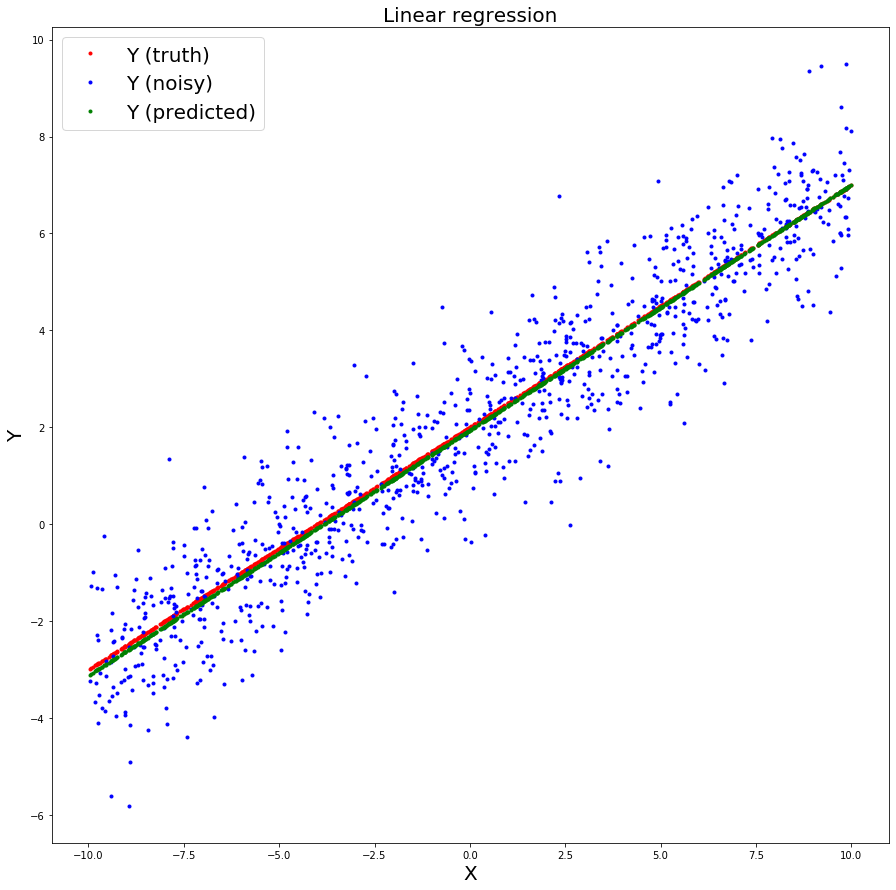

In [8]:
# Make prediction using the model
Y_hat = model_regress1.predict(X)

# Plot noisy data, true model and prediction
plot(X, Y_true, 'r.')
plot(X, Y, 'b.')
plot(X, Y_hat, 'g.')
legend(['Y (truth)', 'Y (noisy)', 'Y (predicted)'], prop={'size': 20})
title('Linear regression', size=20)
xlabel('X', size=20)
ylabel('Y', size=20)

Now, let us consider a model where for a same input variable $X$, we associate 2 output variables $Y_0$ and $Y_1$ defined by $Y_0=2+0.5X$ and $Y_1=-2-0.5X$. As previously, we use Gaussian additive noises to generate $Y_0$ and $Y_1$.

Text(0, 0.5, 'Y')

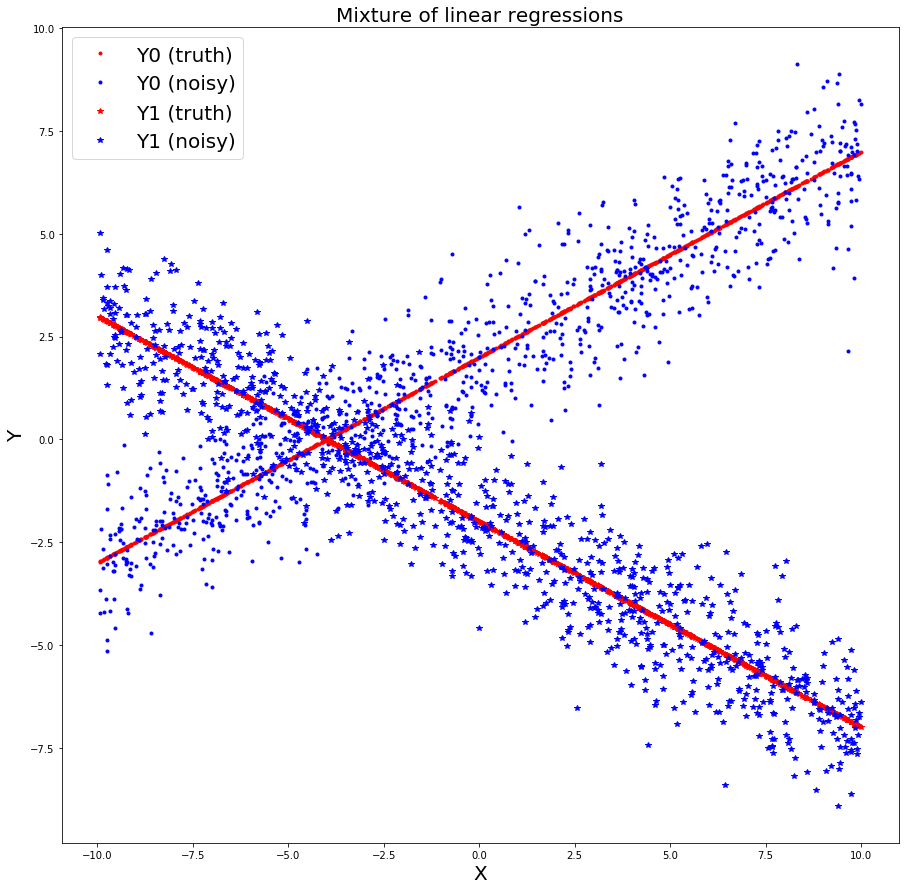

In [9]:
# Generate data
n=1000
X=random.uniform(-10,10,n)
Y0_true=2+0.5*X # true model
Y0=Y0_true+random.normal(0,1,n) # add noise
Y1_true=-2-0.5*X # true model
Y1=Y1_true+random.normal(0,1,n) # add noise
Y_true=vstack([Y0_true,Y1_true]).T
Y=vstack([Y0,Y1]).T

# Plot noisy data and true model
plot(X, Y_true[:,0], 'r.')
plot(X, Y[:,0], 'b.')
plot(X, Y_true[:,1], 'r*')
plot(X, Y[:,1], 'b*')
legend(['Y0 (truth)', 'Y0 (noisy)', 'Y1 (truth)', 'Y1 (noisy)'], prop={'size': 20})
title('Mixture of linear regressions', size=20)
xlabel('X', size=20)
ylabel('Y', size=20)

Here we modify the hidden layer to account for the 2 output variables $Y_0$ et $Y_1$.

In [10]:
# Build our model
model_regress2 = Sequential()

# Declare the layers
layers = [Dense(units=2,input_dim=1), Activation('linear')]

# Add the layers to the model
for layer in layers:
    model_regress2.add(layer)
    
# Configure an optimizer used to minimize the loss function
sgd = SGD(lr=0.1, decay=.01)

# Compile our model
model_regress2.compile(loss='mean_absolute_error', optimizer=sgd)
 
# Fit the model
model_regress2.fit(X, Y, validation_split=0.2, epochs=100)
                   
# Model weights
model_regress2.get_weights()

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 134us/step - loss: 1.8177 - val_loss: 1.2780
Epoch 2/100
800/800 [==============================] - 0s 36us/step - loss: 1.1002 - val_loss: 0.9576
Epoch 3/100
800/800 [==============================] - 0s 24us/step - loss: 0.9051 - val_loss: 0.8626
Epoch 4/100
800/800 [==============================] - 0s 24us/step - loss: 0.8449 - val_loss: 0.8314
Epoch 5/100
800/800 [==============================] - 0s 35us/step - loss: 0.8266 - val_loss: 0.8198
Epoch 6/100
800/800 [==============================] - 0s 28us/step - loss: 0.8169 - val_loss: 0.8175
Epoch 7/100
800/800 [==============================] - 0s 25us/step - loss: 0.8152 - val_loss: 0.8158
Epoch 8/100
800/800 [==============================] - 0s 24us/step - loss: 0.8147 - val_loss: 0.8127
Epoch 9/100
800/800 [==============================] - 0s 27us/step - loss: 0.8083 - val_loss: 0.8170
Epoch 10/100
800/800 [=============

[array([[ 0.50800675, -0.5146651 ]], dtype=float32),
 array([ 2.0441244, -1.9302756], dtype=float32)]

We then compare the fitted (green) and true (red) models.

Text(0, 0.5, 'Y')

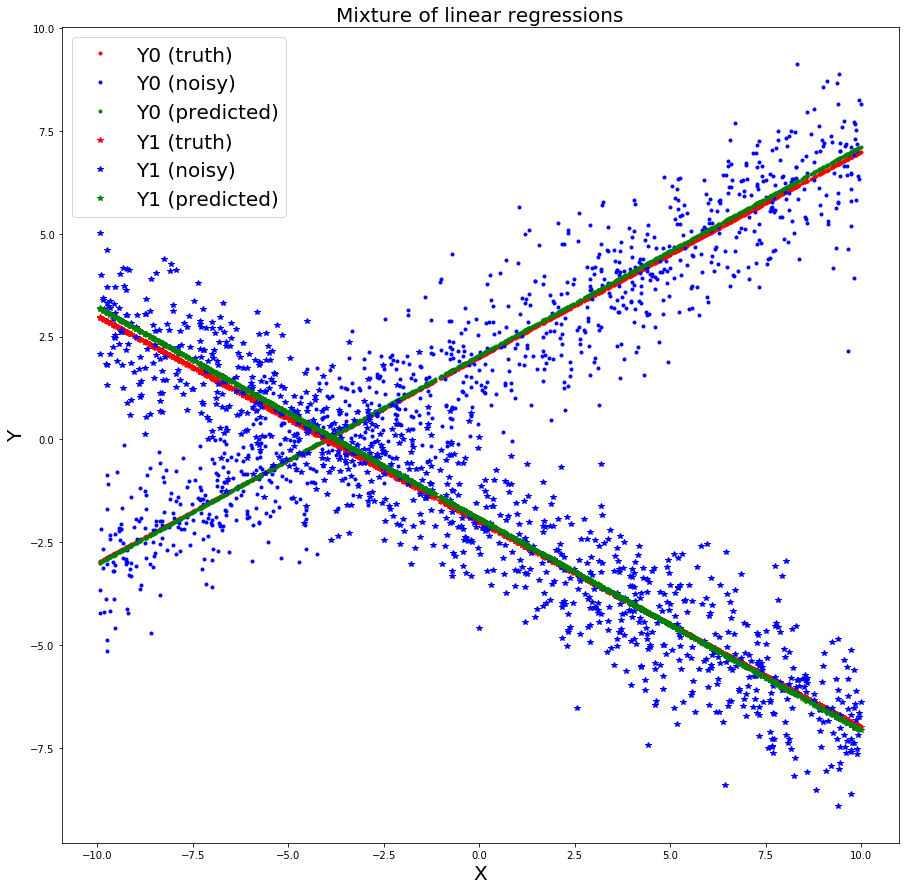

In [11]:
# Make prediction using the model
Y_hat = model_regress2.predict(X)

# Plot noisy data and true model
plot(X, Y_true[:,0], 'r.')
plot(X, Y[:,0], 'b.')
plot(X, Y_hat[:,0], 'g.')
plot(X, Y_true[:,1], 'r*')
plot(X, Y[:,1], 'b*')
plot(X, Y_hat[:,1], 'g*')
legend(['Y0 (truth)', 'Y0 (noisy)', 'Y0 (predicted)', 'Y1 (truth)', 'Y1 (noisy)', 'Y1 (predicted)'], prop={'size': 20})
title('Mixture of linear regressions', size=20)
xlabel('X', size=20)
ylabel('Y', size=20)

**Classification problems**

In a classification problem, $Y$ is a discrete variable with various classes. Here, $Y$ is binary and takes its values between $0$ and $1$. We write the model as $Y=f\left(2+0.5 X\right)$ with $f$ the logistic transfer function (sigmoid). As previously we generate $Y$ adding Gaussian perturbations.

Text(0, 0.5, 'Y')

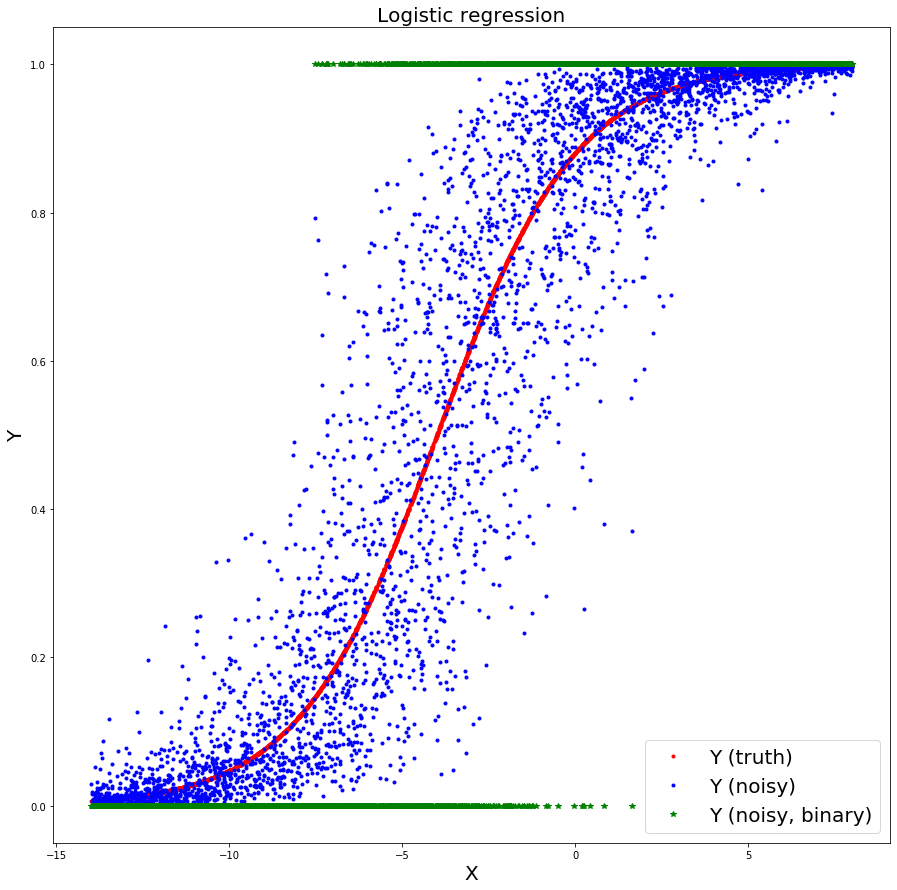

In [12]:
# Generate data
n=4000
X=random.uniform(-14,8,n)
Y_true=1/(1+exp(-(2+0.5*X))) # true model
Y_noise=1/(1+exp(-(2+0.5*X+random.normal(0,1,n)))) # add noise to the truth

Y=(Y_noise>0.5).astype(float) # transform to binary data

# Plot noisy data and true model
plot(X, Y_true, 'r.')
plot(X, Y_noise, 'b.')
plot(X, Y, 'g*')
legend(['Y (truth)','Y (noisy)', 'Y (noisy, binary)'], prop={'size': 20})
title('Logistic regression', size=20)
xlabel('X', size=20)
ylabel('Y', size=20)

We build our neural net using a sigmoid activation function, corresponding to the logistic function. For such a classification problem, we try to minimize a loss function based on the binary cross-entropy.

In [13]:
# Build our model
model_classif1 = Sequential()

# Declare the layers
layers = [Dense(units=1, input_dim=1), Activation('sigmoid')]
 
# Add the layers to the model
for layer in layers:
    model_classif1.add(layer)
    
# Configure an optimizer used to minimize the loss function
sgd = SGD(lr=0.1, decay=.01)

# Compile our model
model_classif1.compile(loss='binary_crossentropy', optimizer=sgd)
 
# Fit the model
model_classif1.fit(X, Y, validation_split=0.2, epochs=200)

# Model weights
model_classif1.get_weights()

Train on 3200 samples, validate on 800 samples
Epoch 1/200
3200/3200 [==============================] - 0s 65us/step - loss: 0.2993 - val_loss: 0.2419
Epoch 2/200
3200/3200 [==============================] - 0s 27us/step - loss: 0.2417 - val_loss: 0.2145
Epoch 3/200
3200/3200 [==============================] - 0s 33us/step - loss: 0.2246 - val_loss: 0.2022
Epoch 4/200
3200/3200 [==============================] - 0s 27us/step - loss: 0.2156 - val_loss: 0.1955
Epoch 5/200
3200/3200 [==============================] - 0s 33us/step - loss: 0.2102 - val_loss: 0.1904
Epoch 6/200
3200/3200 [==============================] - 0s 32us/step - loss: 0.2063 - val_loss: 0.1865
Epoch 7/200
3200/3200 [==============================] - 0s 27us/step - loss: 0.2035 - val_loss: 0.1839
Epoch 8/200
3200/3200 [==============================] - 0s 31us/step - loss: 0.2012 - val_loss: 0.1816
Epoch 9/200
3200/3200 [==============================] - 0s 29us/step - loss: 0.1995 - val_loss: 0.1798
Epoch 10/200
3200

3200/3200 [==============================] - 0s 34us/step - loss: 0.1800 - val_loss: 0.1576
Epoch 156/200
3200/3200 [==============================] - 0s 35us/step - loss: 0.1800 - val_loss: 0.1576
Epoch 157/200
3200/3200 [==============================] - 0s 32us/step - loss: 0.1800 - val_loss: 0.1575
Epoch 158/200
3200/3200 [==============================] - 0s 33us/step - loss: 0.1800 - val_loss: 0.1575
Epoch 159/200
3200/3200 [==============================] - 0s 34us/step - loss: 0.1800 - val_loss: 0.1575
Epoch 160/200
3200/3200 [==============================] - 0s 37us/step - loss: 0.1799 - val_loss: 0.1575
Epoch 161/200
3200/3200 [==============================] - 0s 35us/step - loss: 0.1799 - val_loss: 0.1574
Epoch 162/200
3200/3200 [==============================] - 0s 37us/step - loss: 0.1799 - val_loss: 0.1574
Epoch 163/200
3200/3200 [==============================] - 0s 36us/step - loss: 0.1799 - val_loss: 0.1574
Epoch 164/200
3200/3200 [==============================] - 0

[array([[0.6900411]], dtype=float32), array([2.561428], dtype=float32)]

The estimated weights can be far from the true parameters ($0.5$ and $2$). To improve the estimation, we can increase the database (*n* in the above code) and the number of iterations to fit the model (*epochs* in the *fit* function). Then, we plot the true (red) and estimated (green) classification models.

Text(0, 0.5, 'Y')

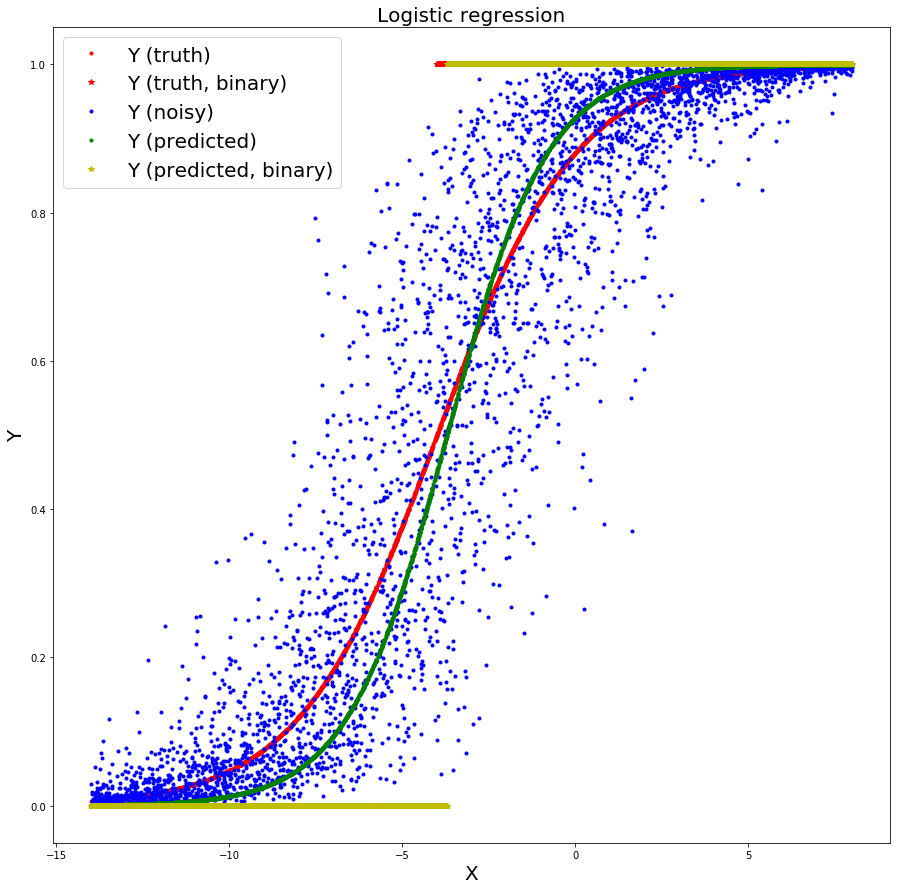

In [14]:
# Make prediction using the model
Y_hat = model_classif1.predict(X)

# Plot noisy data, true model and prediction
plot(X, Y_true, 'r.')
plot(X, (Y_true>0.5).astype(float), 'r*')
plot(X, Y_noise, 'b.')
plot(X, Y_hat, 'g.')
plot(X, (Y_hat>0.5).astype(float), 'y*')
legend(['Y (truth)','Y (truth, binary)', 'Y (noisy)', 'Y (predicted)', 'Y (predicted, binary)'], prop={'size': 20})
title('Logistic regression', size=20)
xlabel('X', size=20)
ylabel('Y', size=20)

Now, let us consider a more complicated classification model where we have 2 input variables ($X_0$, $X_1$) and a binary output variable $Y$. The link between the $X$ variables and $Y$ is nonlinear (moon shape).

Text(0, 0.5, 'X1')

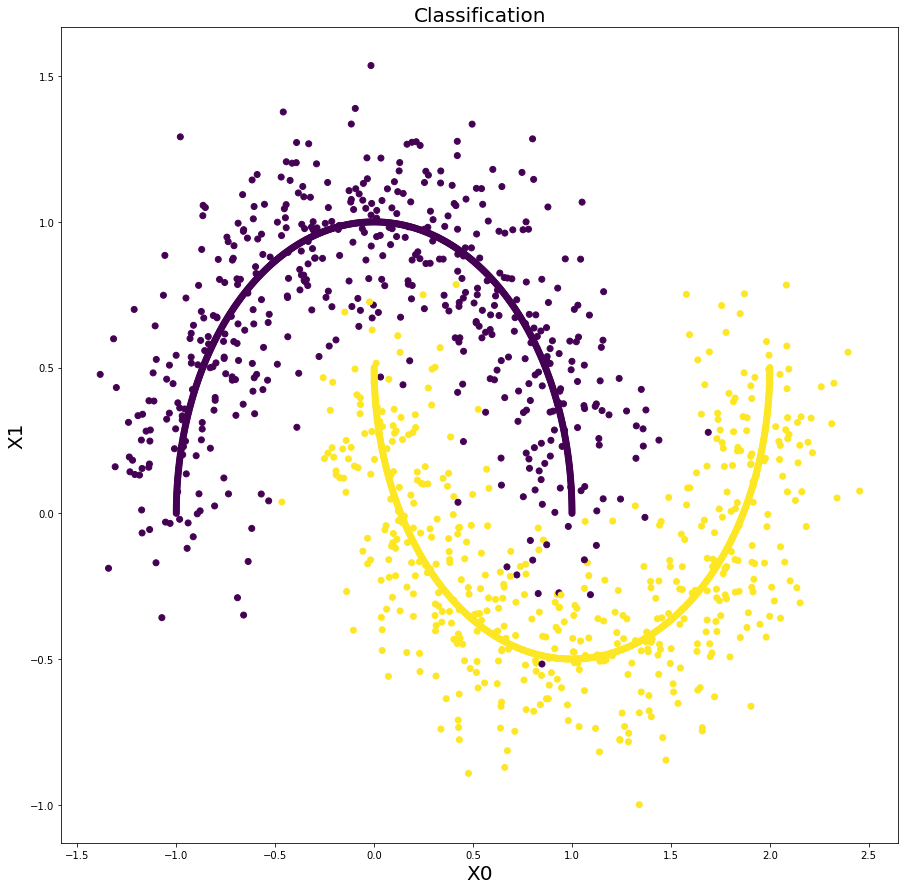

In [15]:
# Import machine learning library
from sklearn.datasets import make_moons

# Generate data
n=1000
X_true,Y_true=make_moons(noise=0.00001,random_state=0,n_samples=n) # true model
X,Y=make_moons(noise=0.2,random_state=0,n_samples=n) # noisy data

# Plot true model and noisy data
scatter(X[:,0], X[:,1], c=Y)
scatter(X_true[:,0], X_true[:,1], c=Y_true)
title('Classification', size=20)
xlabel('X0', size=20)
ylabel('X1', size=20)

Try first to adjust a simple neural net with 1 hidden layer, 1 neurone and a logistic loss function. Then, test 
a more complex network with 3 hidden layers and relu (rectified linear unit) activations. For more information concerning the different activation functions, please see https://fr.wikipedia.org/wiki/Fonction_d'activation#cite_note-7. We stock the fitted model in the variable *history*.

In [49]:
# Build our model
model_classif2 = Sequential()
 
# Declare the layers
#layers = [Dense(units=1, input_dim=2), Activation('sigmoid')] # try this one first
layers = [Dense(units=8, input_dim=2), Activation('relu'), # then this one
          #Dense(units=6), Activation('relu'),
          Dense(units=1), Activation('sigmoid')]

# Add the layers to the model
for layer in layers:
    model_classif2.add(layer)
    
# Configure an optimizer used to minimize the loss function
sgd = SGD(lr=0.1, decay=.01) # try this one first
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) # then, try this one

# Compile our model
model_classif2.compile(loss='binary_crossentropy', optimizer=adam) # sgd or adam
 
# Fit the model
history = model_classif2.fit(X, Y, validation_split=0.2, epochs=1000, verbose=0)

# Model weights
model_classif2.get_weights()

[array([[-0.07742549,  0.37887144, -0.06861092, -0.01004673, -3.8276198 ,
         -0.03845553,  0.11577466,  0.26287344],
        [ 1.3909569 , -0.7685725 ,  0.02044017, -0.14614326,  1.0901612 ,
          0.17683251, -0.7366104 ,  1.3655031 ]], dtype=float32),
 array([ 0.06868467,  0.8261531 , -0.10485777, -0.13272601, -1.2964749 ,
        -0.24468689,  0.82213014,  0.452209  ], dtype=float32),
 array([[ -1.2574466 ],
        [  1.1526362 ],
        [  0.34942573],
        [ -0.6081902 ],
        [-10.512     ],
        [  0.5215403 ],
        [  1.6938483 ],
        [ -1.073448  ]], dtype=float32),
 array([-0.01303237], dtype=float32)]

Text(0.5, 1.0, 'Noisy data and predictions')

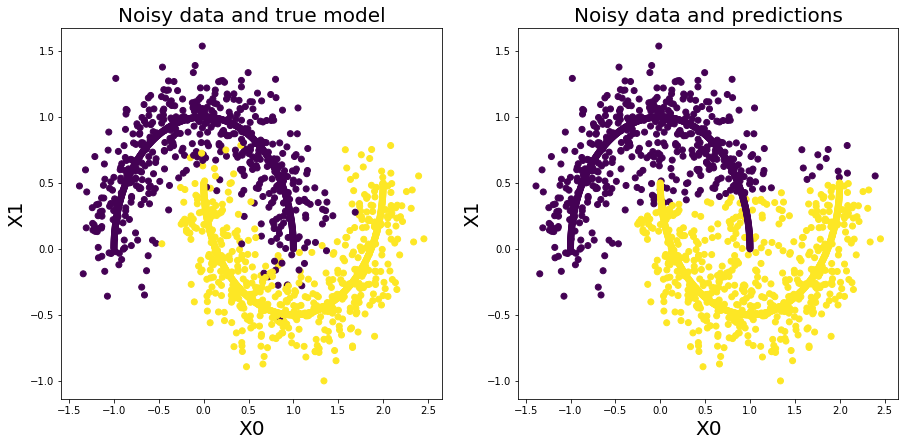

In [50]:
# Make prediction using the model
Y_hat = model_classif2.predict(X)

# Plot noisy data, true model and prediction
subplot(2,2,1)
scatter(X[:,0], X[:,1], c=Y)
scatter(X_true[:,0], X_true[:,1], c=Y_true)
xlabel('X0', size=20)
ylabel('X1', size=20)
title('Noisy data and true model', size=20)
subplot(2,2,2)
#scatter(X[:,0], X[:,1], c=Y_hat[:,0]) # fuzzy prediction
scatter(X[:,0], X[:,1], c=Y_hat[:,0]>0.5) # binary prediction
scatter(X_true[:,0], X_true[:,1], c=Y_true)
xlabel('X0', size=20)
ylabel('X1', size=20)
title('Noisy data and predictions', size=20)

The predicted values (right) are given between $0$ (blue) and $1$ (red). The algorithm converges when the classification boundary is well defined between the 2 scatter plots. Finally, we can use the *history* variable and plot the evolution of the loss function for the training and test datasets.

Text(0.5, 1.0, 'Learning rate')

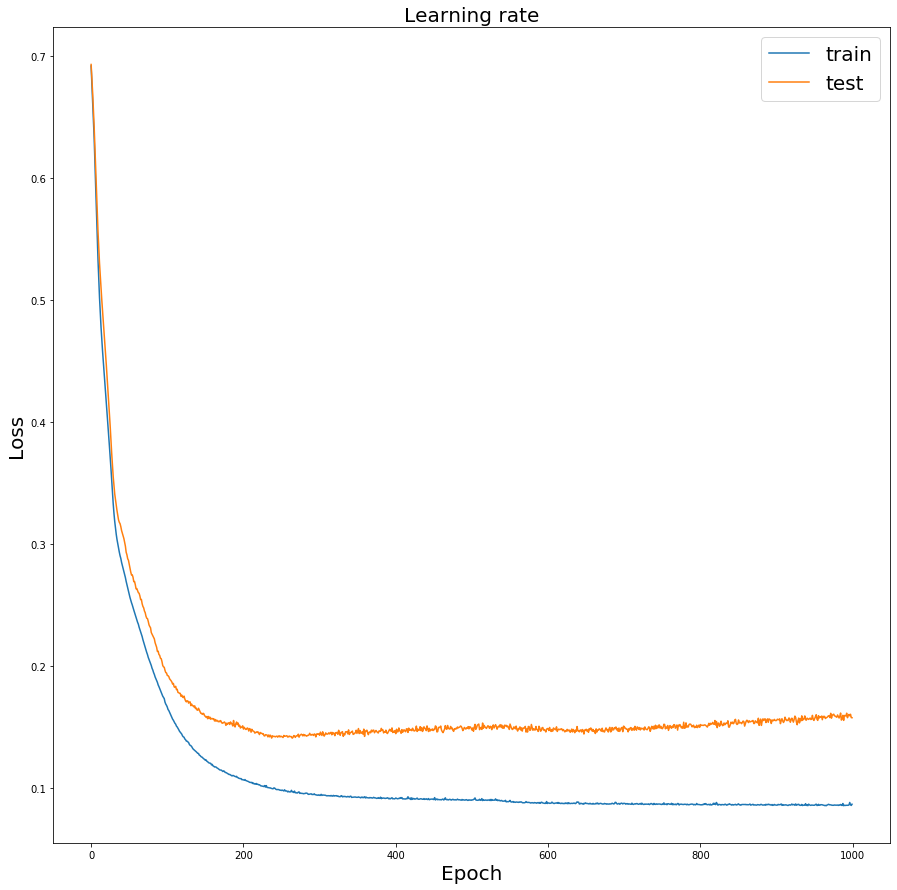

In [48]:
# Summarize history for loss
plot(history.history['loss'])
plot(history.history['val_loss'])
ylabel('Loss', size=20)
xlabel('Epoch', size=20)
legend(['train', 'test'], prop={'size': 20})
title('Learning rate', size=20)

**Classification problem on real data**

Congratulations, you are now ready to apply regression or classification problems on real data. Here, we propose to use a well known dataset in statistic: *iris*. The output variable $y$ are different iris species (Setosa, Versicolour, Virginica) and input variables $x$ are the length/width of the sepal/petal. Try to construct your own neural net, learn it on a training dataset ($x_{train}$ and $x_{train}$, 80%) and test it on a independant test dataset ($x_{test}$ and $y_{test}$, 20%).

In [49]:
from sklearn.datasets import load_iris

In [50]:
iris = load_iris()

In [51]:
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

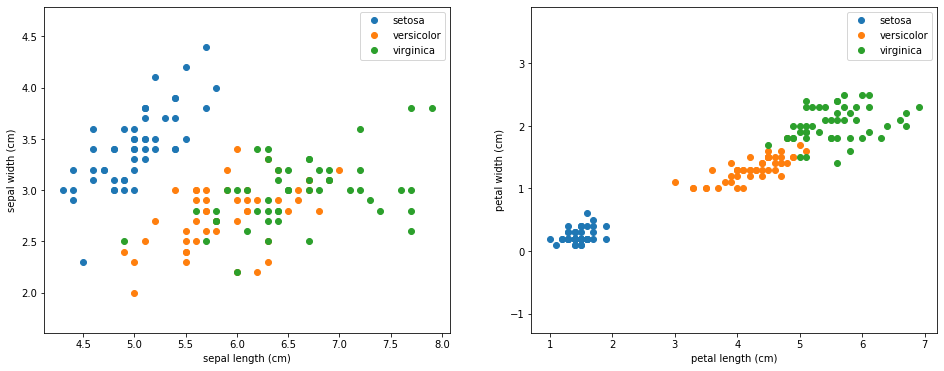

In [53]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();


In [36]:
#utiliser  softmax